<a href="https://colab.research.google.com/github/m-cheicki/ESILV_Neural_Networks/blob/main/CNN_for_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network for CIFAR-10 - Image Classification

## How to activate GPU in Google Colab

Go to Edit -> Notebook Settings and choose "GPU". 

Check if it is working by running this following code : 


In [2]:
try: 
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception: 
  pass

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

The output `/device:GPU:0` tells us that the GPU is working just fine!

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6039860268148317015, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1564896512461343074
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

## Exercises 

### Ex 1: Load the data

In [85]:
import numpy as np
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [17]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [18]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

### Ex 2: Normalize data

In [10]:
def normalize(train, test):
  # convert int to float32
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
 
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0

	# return normalized images
	return train_norm, test_norm

In [11]:
x_train, x_test = normalize(x_train, x_test)

### Ex 3: Define the model (NET I)

In [65]:
def define_model(): 
  # CONV - POOL - CONV - POOL - CONV - POOL - FC - FC
  model = Sequential()

  model.add(Conv2D(filters = 32, kernel_size = 3, activation='relu', data_format = 'channels_last', padding='valid', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

  model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu', padding='valid'))
  model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

  model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu', padding='valid'))
  model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
  
  # Flatten output of the previous layer
  model.add(Flatten())

  # Fully-Connected (FC) layers
  model.add(Dense(512, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model


### Ex 4: Model Summary

In [66]:
model = define_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

### Ex 5: Compile the model


In [67]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Ex 6: Train model

In [68]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [69]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=0)

### Ex 7: Evaluate the model

In [70]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss, test_acc

313/313 [==============================] - 1s 2ms/step - loss: 1.4498 - accuracy: 0.6250


(1.4497840404510498, 0.625)

### Ex 8: Predict

In [71]:
predictions = model.predict(x_test)

In [72]:
predictions = [predictions[i].argmax() for i in range(len(predictions))]

In [74]:
def accuracy(pred, actual): 
  count = 0 
  for i in range(len(pred)): 
    if pred[i] == actual[i] : 
      count += 1
  return (count/len(pred))*100

In [75]:
acc = accuracy(predictions, y_test)
print(f'Accuracy : {acc}%')

Accuracy : 62.5%


### Ex 9: History

In [58]:
import matplotlib.pyplot as plt

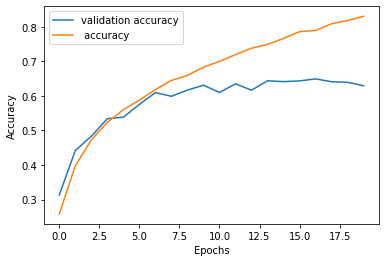

In [76]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['validation accuracy', ' accuracy'])

In [62]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Ex 10: 

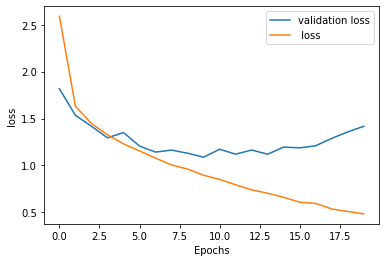

In [77]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['validation loss', ' loss'])

Validation loss curve is higher than the training loss from 4 epochs, so there is overfitting after 3 epochs.

### Ex 11: Second model (NET II)

In [78]:
# CONV - CONV - POOL - CONV - POOL - FC - FC 
second_model = Sequential()

second_model.add(Conv2D(filters = 32, kernel_size = 5, activation='relu', data_format = 'channels_last', padding='valid', input_shape=(32, 32, 3)))
second_model.add(Conv2D(filters = 64, kernel_size = 5, activation='relu', padding='valid'))
second_model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

second_model.add(Conv2D(filters = 64, kernel_size = 5, activation='relu', padding='valid'))
second_model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

# Flatten output of the previous layer
second_model.add(Flatten())

# Fully-Connected (FC) layers
second_model.add(Dense(512, activation='relu'))
second_model.add(Dense(10, activation='softmax'))

### Ex 12: Summary of the model

In [79]:
second_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          102464    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

### Ex 13: Compile the second model

In [80]:
second_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Ex 14: Fit the second model

In [81]:
second_history = second_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=0)

### Ex 15: Evaluate the model

In [82]:
test_loss2, test_acc2 = second_model.evaluate(x_test, y_test)
test_loss2, test_acc2

313/313 [==============================] - 1s 3ms/step - loss: 2.6449 - accuracy: 0.6151


(2.644885540008545, 0.6151000261306763)

### Ex 16: Plots

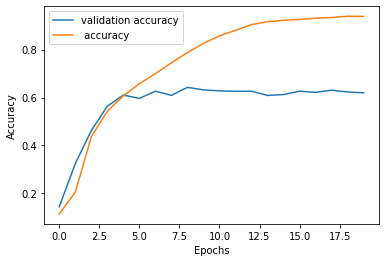

In [83]:
plt.plot(second_history.history['val_accuracy'])
plt.plot(second_history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['validation accuracy', ' accuracy'])

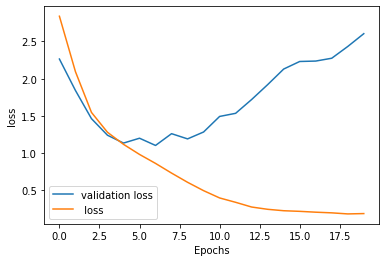

In [84]:
plt.plot(second_history.history['val_loss'])
plt.plot(second_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['validation loss', ' loss'])

Validation loss curve is higher than the training loss from 4 epochs, so there is overfitting after 4 epochs.

### Ex 17: Third model

In [106]:
# CONV − CONV − POOL - CONV - POOL − CONV − CONV − POOL − FC − FC − FC
third_model = Sequential()

third_model.add(Conv2D(filters = 96, kernel_size = 3, strides = 1 , activation='relu', data_format = 'channels_last', padding='valid', input_shape=(32, 32, 3)))
third_model.add(Conv2D(filters = 96, kernel_size = 3, strides = 1, activation='relu', padding='valid'))
third_model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
third_model.add(Dropout(0.5))

third_model.add(Conv2D(filters = 128, kernel_size = 3, strides = 1, activation='relu', padding='valid'))
third_model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
third_model.add(Dropout(0.5))

third_model.add(Conv2D(filters = 128, kernel_size = 3, strides = 1, activation='relu', padding='valid'))
third_model.add(Conv2D(filters = 128, kernel_size = 3, strides = 1, activation='relu', padding='valid'))
third_model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
third_model.add(Dropout(0.5))

# Flatten output of the previous layer
third_model.add(Flatten())

# Fully-Connected (FC) layers
third_model.add(Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(5e-4)))
third_model.add(Dropout(0.5))
third_model.add(Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(5e-4)))
third_model.add(Dropout(0.5))
third_model.add(Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(5e-4)))

### Ex 18: Summary - Compile - Fit - Evaluate - Plots


In [107]:
third_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 30, 30, 96)        2688      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 96)        83040     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 96)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 12, 12, 128)       110720    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 6, 6, 128)        

In [108]:
third_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [109]:
third_history = third_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=0)

In [110]:
test_loss3, test_acc3 = third_model.evaluate(x_test, y_test)
test_loss3, test_acc3

313/313 [==============================] - 1s 3ms/step - loss: 1.2010 - accuracy: 0.6521


(1.2009522914886475, 0.6521000266075134)

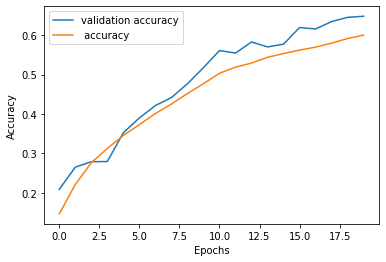

In [111]:
plt.plot(third_history.history['val_accuracy'])
plt.plot(third_history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['validation accuracy', ' accuracy'])

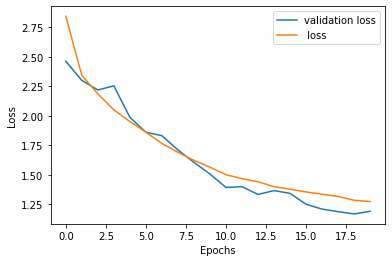

In [112]:
plt.plot(third_history.history['val_loss'])
plt.plot(third_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['validation loss', ' loss'])

It seems like there is no-overfitting with this model. 

### Ex 19: Is it possible to have better results ? 

We can try to modify some parameters of the model like the optimizers. Here we have used Adam's optimizer. 

We have also used the L2 regularization, but we can try other ones. 

Maybe we can also add more hidden layers. 